# Group Project



Formar grupos de 2, máximo 3 pessoas.

**Dataset:** https://www.kaggle.com/tmdb/tmdb-movie-metadata


**Objectivo:** Usar técnicas de regressão para prever a rating de um filme com base em diferentes características.


**Notas importantes**
    
    1. Usar a coluna "vote_average" como target.
    2. Usar técnicas de regressão para prever a rating (vote_average) que um filme terá com base em diferentes caracteristicas.
    
**Recomendações**
    
    1. Não é necessário, nem recomendável, usar todas as features disponíveis (especialmente as que não são númericas).
    2. O exercício pode demorar muito ou pouco tempo, dependendo da exploração que for feita. Não é esperado que sejam explorados todos os detalhes, nem todas as abordagens possíveis.
    3. Se houver falta de tempo para explorar tudo o que gostariam, ou querem fazer alguma técnica que iria levar muito tempo, expliquem por escrito qual era a ideia e o que esperariam obter.
    4. Tentem explicar o máximo possível o racícionio por detrás de todos os passos que afectuarem.
    5. Acima de tudo, divirtam-se!
    
**Perguntas**

    1. Quantos filmes existem no dataset? E quantas features?
    2. Existem variáveis que não são independentes entre si?
    3. Qual a técnica de regressão que levou a melhores resultados?
    4. Quais os factores que mais contribuem para o sucesso de um filme?
    5. Recomendariam o vosso modelo a uma produtora de filmes?
    

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np

In [10]:
use_google_colab = False
seed = 42

In [11]:
if use_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    datapath = '/content/drive/My Drive/Fundamentos_ML_Dados/tmdb_5000_movies.csv'
else:
    datapath = 'tmdb_5000_movies.csv'

In [12]:
df = pd.read_csv(datapath)

In [13]:
print(f'movies no.{df.shape[0]}')
print(f'feature no.{df.shape[1]}')

movies no.4803
feature no.20


In [14]:
len(df["id"].unique())

4803

Nº  Features são apenas 18, porque o id é apenas um  identificador, e a coluna targetnão é considerado uma feature.

In [15]:
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3642,5000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",http://www.atlasshruggedmovie.com/,199933,"[{""id"": 33452, ""name"": ""trilogy""}, {""id"": 1732...",en,Atlas Shrugged Part III: Who is John Galt?,"Approaching collapse, the nation's economy is ...",1.731035,"[{""name"": ""Atlas 3 Productions"", ""id"": 67480}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-09-12,846704,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who is John Galt?,Atlas Shrugged Part III: Who is John Galt?,3.9,15
278,100000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",NaN,869,"[{""id"": 690, ""name"": ""gorilla""}, {""id"": 1826, ...",en,Planet of the Apes,After a spectacular crash-landing on an unchar...,51.188633,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-07-25,362211740,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You'll be sorry you were ever born human,Planet of the Apes,5.6,1243
1483,33000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",NaN,85446,"[{""id"": 186730, ""name"": ""flash mob""}, {""id"": 1...",en,Step Up Revolution,Emily arrives in Miami with aspirations to bec...,29.775441,"[{""name"": ""Summit Entertainment"", ""id"": 491}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-26,140470746,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One Step Can Change Your World,Step Up Revolution,6.7,663
2293,20000000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 27, ""...",NaN,29427,"[{""id"": 321, ""name"": ""terror""}, {""id"": 1865, ""...",en,The Crazies,Four friends find themselves trapped in their ...,28.867568,"[{""name"": ""Penn Station Entertainment"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-26,54956140,101.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear Thy Neighbor,The Crazies,6.2,633
2664,14000000,"[{""id"": 37, ""name"": ""Western""}]",NaN,33,"[{""id"": 549, ""name"": ""prostitute""}, {""id"": 798...",en,Unforgiven,"William Munny is a retired, once-ruthless kill...",37.380435,"[{""name"": ""Malpaso Productions"", ""id"": 171}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1992-08-07,159157447,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some legends will never be forgotten. Some wro...,Unforgiven,7.7,1113


In [16]:
# prompt: print collumns name df

df.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

<Axes: >

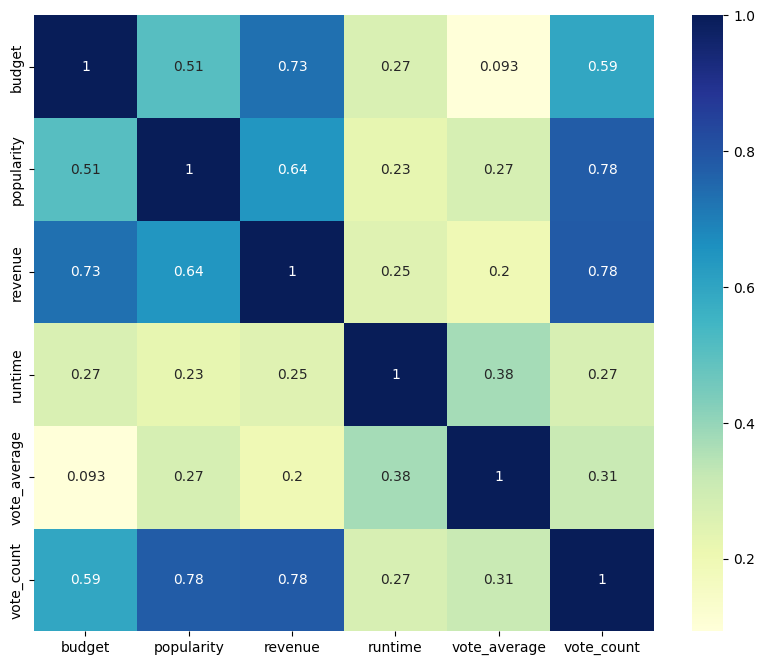

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
var_to_remove = ["id"]

numeric_var_df = numeric_df.drop(var_to_remove, axis=1)
spearman_corr = numeric_var_df.corr(method='spearman')
fig = plt.figure(figsize = (10, 8))
sns.heatmap(numeric_var_df.corr(), annot=True, cmap = "YlGnBu")

<Axes: >

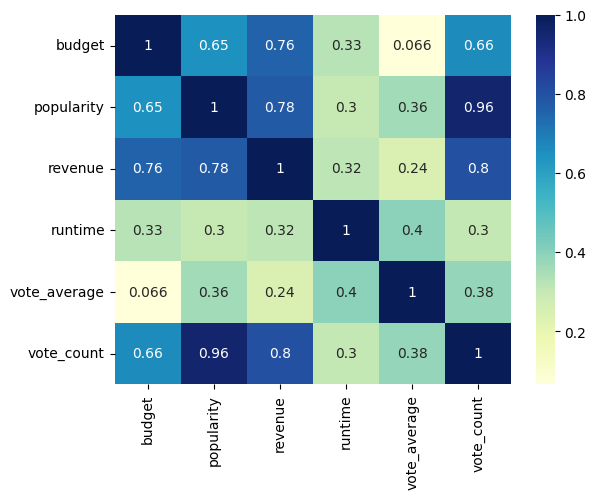

In [18]:
sns.heatmap(spearman_corr, annot=True, cmap = "YlGnBu")

Sim existem variaveis que não são independentes entre si, (popularity and vote_count), (revenue and vote count), (budget and revenue) and  (revenue and popularity)

In [19]:
# prompt: drop nulls variable runtime

numeric_var_df.dropna(inplace=True)


In [20]:
# prompt: list  correlation variables on dataframe numeric_var_df, exclude itself correaltion, minimum correlation 0.5, e
numeric_var_df.isnull().sum()
numeric_var_df.dropna(inplace=True)
# Calculate the correlation matrix
correlation_matrix = numeric_var_df.corr()

# Exclude self-correlation
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)

# Find variables with correlation above 0.5
correlated_vars = correlation_matrix[abs(correlation_matrix) >= 0.5]

# Print the correlated variables
correlated_vars


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,NaN,0.505346,0.730798,NaN,NaN,0.593135
popularity,0.505346,NaN,0.644677,NaN,NaN,0.778098
revenue,0.730798,0.644677,NaN,NaN,NaN,0.781462
runtime,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,NaN,NaN,NaN,NaN,NaN,NaN
vote_count,0.593135,0.778098,0.781462,NaN,NaN,NaN


In [21]:
df = df.sample(frac=0.2)

df = df.drop(['popularity'], axis=1)

In [22]:
print(df.columns.tolist())


['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


---

In [23]:
def adjusted_r2(r2, X):


    return (1 - ((1 - r2)*(X.shape[0] - 1)/(X.shape[0] - X.shape[1] - 1)))

# 3

pre processae«mento
---

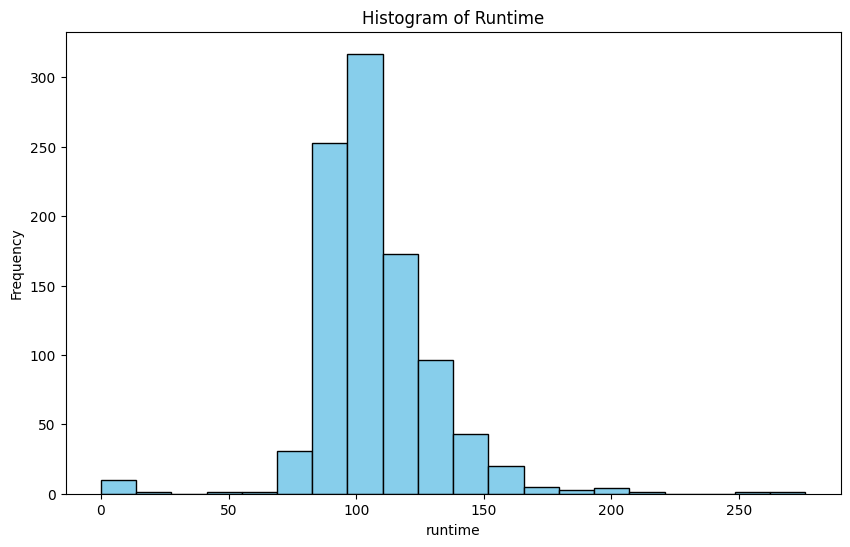

In [24]:
# prompt: create histogram variable RunTime

import matplotlib.pyplot as plt
# Assuming 'RunTime' is a column in your DataFrame 'df'
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Runtime')
plt.show()


In [25]:
# prompt: variable runtime describe

# Assuming 'runtime' is the column you want to describe
runtime_description = df['runtime'].describe()
runtime_description


count    961.00000
mean     107.30385
std       24.01465
min        0.00000
25%       94.00000
50%      104.00000
75%      119.00000
max      276.00000
Name: runtime, dtype: float64

In [26]:
# prompt: create kurtosis  and skewness variable runtime

# Calculate kurtosis and skewness
kurtosis = df['runtime'].kurtosis()
skewness = df['runtime'].skew()

print(f"Kurtosis of runtime: {kurtosis}")
print(f"Skewness of runtime: {skewness}")


Kurtosis of runtime: 8.358476970887486
Skewness of runtime: 0.45439814150987207


In [27]:
# prompt: variable runtime fill null with median

# Fill NaN values in 'runtime' with the median
numeric_df['runtime'] = numeric_df['runtime'].fillna(numeric_df['runtime'].median())


In [28]:
train_set, test_set = train_test_split(numeric_df, test_size = 0.2, random_state = seed)

In [69]:
train_set_staged = numeric_df.sample(frac=1)

#Utilizar isto para iterar a pipeline! Começar com uma fração dos dados.
train_set_staged = train_set

In [70]:
X_train = train_set_staged.drop(columns=var_to_remove)
y_train = train_set_staged['vote_average']

X_test = test_set.drop(columns=var_to_remove)
y_test = test_set['vote_average']

In [71]:
# prompt: list null x_train

X_train.isnull().sum()


budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

# Definir o pipeline
regression_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normaliza os dados
    ('poly_features', PolynomialFeatures()),  # Gera termos polinomiais
    ('regressor', LinearRegression())  # Modelo de regressão linear
])

# Definir os hiperparâmetros para otimização
param_grid = {
    "poly_features__degree": [1, 2, 3, 4],  # Grau do polinómio
    "regressor__fit_intercept": [True, False]  # Incluir termo de intercepto

}

# Aplicar GridSearchCV
grid_search = GridSearchCV(regression_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Importações dos regressores
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

seed = 42

models_and_params = [
    # Exemplo: Rede Neural (ANN)
    (
        'ann',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', MLPRegressor(random_state=seed))
        ]),
        {
            "Regressor__hidden_layer_sizes": [(20,), (40,), (20, 40), (40, 20), (20, 40, 60), (60, 40, 20)],
            "Regressor__max_iter": [100, 1000]
        }
    ),
    # Exemplo: Random Forest para regressão
    (
        'random_forest',
        RandomForestRegressor(random_state=seed),
        {
            'n_estimators': [10, 100, 300],
            'max_depth': [2, 4, 6]
        }
    ),
    # Exemplo: Decision Tree para regressão
    (
        'decision_tree',
        DecisionTreeRegressor(random_state=seed),
        {
            'max_depth': [2, 4, 6, 8],
            'min_samples_split': [2, 4, 6, 10],
            'min_samples_leaf': [1, 4, 10],
            'criterion': ["squared_error", "absolute_error"],
            'splitter': ["best", "random"]
        }
    ),
    # Exemplo: SVM para regressão (SVR)
    (
        'svm',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', SVR())
        ]),
        {
            "Regressor__C": [0.1, 1, 10],
            "Regressor__gamma": np.logspace(-9, 3, 10),
            "Regressor__kernel": ["linear", "rbf"]
        }
    ),
    # Exemplo: KNN para regressão
    (
        'knn',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', KNeighborsRegressor())
        ]),
        {
            "Regressor__n_neighbors": [1, 10, 100]
        }
    ),
    # Exemplo: Regressão Polinomial
   (
    'polynomial_regression',
    Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('regressor', LinearRegression())
    ]),
    {
        'poly__degree': [2, 3, 4],
        'regressor__fit_intercept': [True, False]
    }
),
    # Exemplo: Regressão Múltipla (LinearRegression)
    (
        'multiple_linear_regression',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('regressor', LinearRegression())
        ]),
        {
            'regressor__fit_intercept': [True, False]
            # Você pode incluir mais parâmetros se necessário
        }
    )
]


In [73]:
grid_search_results = []

for model_str, clf, params in models_and_params:
  print(f"Currently assessing {model_str}")
  grid_searech_result = GridSearchCV(clf, params, cv = 5).fit(X_train, y_train)
  grid_search_results.append(grid_searech_result)

Currently assessing ann


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

Currently assessing random_forest
Currently assessing decision_tree


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Currently assessing svm
Currently assessing knn
Currently assessing polynomial_regression
Currently assessing multiple_linear_regression


In [64]:
from sklearn.model_selection import GridSearchCV

def get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula resíduos (y_test - y_pred).
      5) Retorna um dicionário com os resíduos de cada modelo.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - residuals_dict: dicionário {nome_modelo: vetor_de_residuos}
    """
    residuals_dict = {}
    y_pred_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Cálculo dos resíduos (valor real - predito)
        residuals = y_test - y_pred

        # Armazena no dicionário
        residuals_dict[model_name] = residuals
        y_pred_dict[model_name] = y_pred

    return residuals_dict, y_pred_dict


In [65]:
residuals_dict, y_pred_dict= get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5)

In [56]:
residuals_dict.keys()

dict_keys(['ann', 'random_forest', 'decision_tree', 'svm', 'knn', 'polynomial_regression', 'multiple_linear_regression'])

In [67]:
y_pred_dict.keys()

dict_keys(['ann', 'random_forest', 'decision_tree', 'svm', 'knn', 'polynomial_regression', 'multiple_linear_regression'])

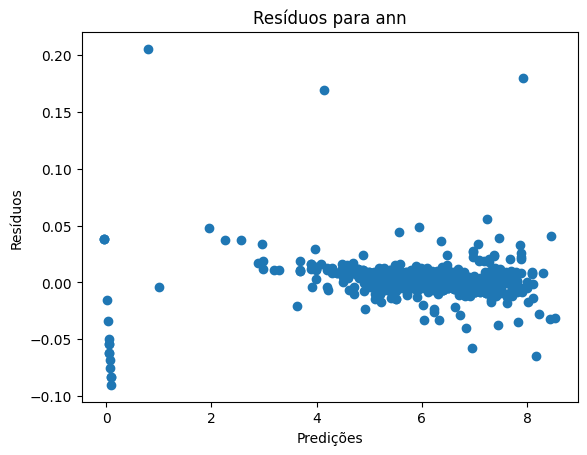

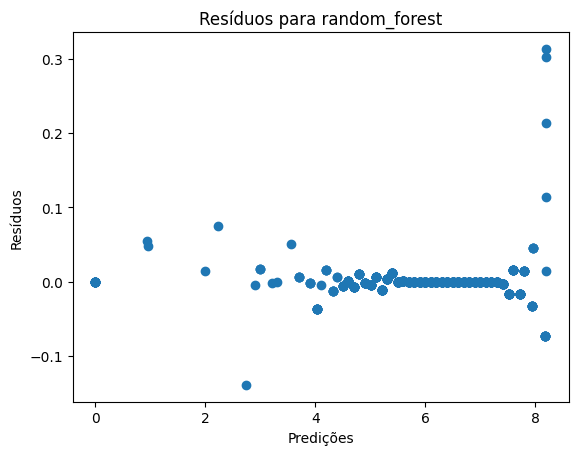

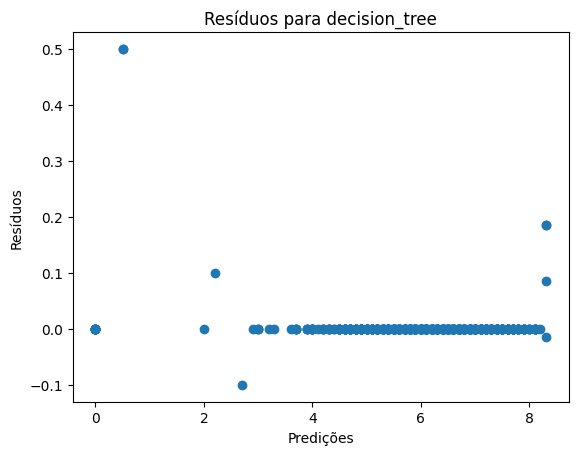

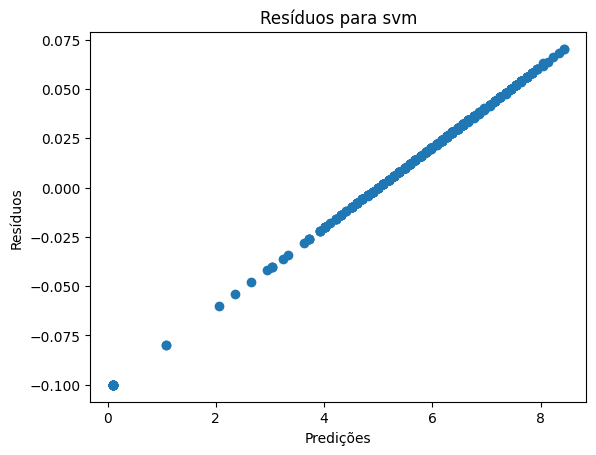

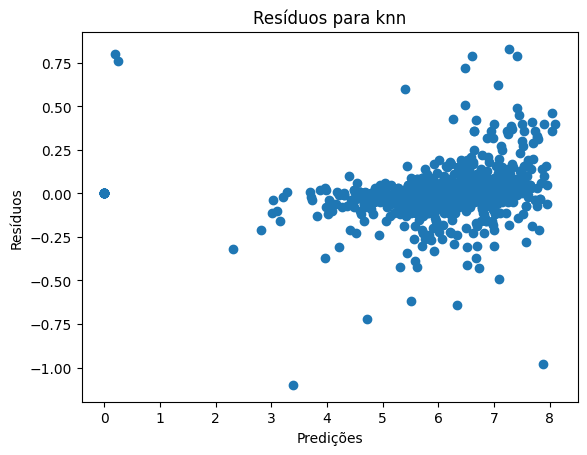

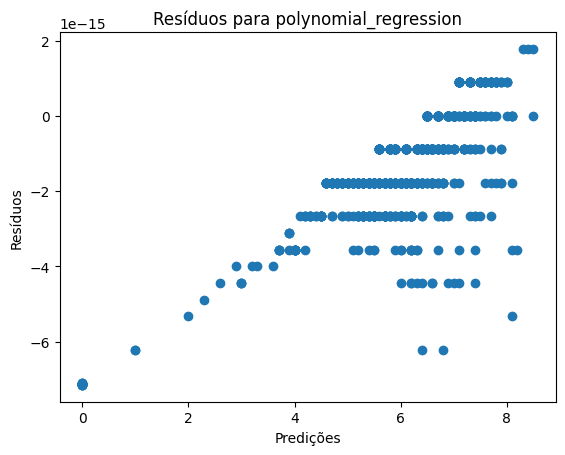

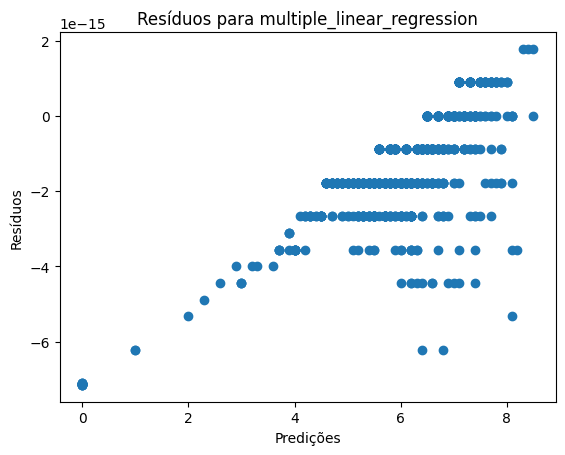

In [68]:
for model_name in residuals_dict:
    current_residuals = residuals_dict[model_name]  # array/Series
    current_y_pred    = y_pred_dict[model_name]      # array/Series

    plt.scatter(current_y_pred, current_residuals)
    plt.xlabel("Predições")
    plt.ylabel("Resíduos")
    plt.title(f"Resíduos para {model_name}")
    plt.show()

In [ ]:
grid_search_results

---

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

X_train_mlr = train_set[['budget','vote_count']]
y_train = train_set['vote_average']

X_test_mlr =test_set[['budget', 'vote_count']]
y_test = test_set['vote_average']



In [ ]:
mlr_model = LinearRegression().fit(X_train_mlr, y_train)

y_preds = mlr_model.predict(X_test_mlr)

In [ ]:
r2_mlr = r2_score(y_test, y_preds)

r2_mlr

In [ ]:
residuals = y_preds - y_test

plt.scatter(y_preds, residuals)

In [ ]:
null_counts = df.isnull().sum()
null_counts

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_sample.runtime, bins=30, edgecolor='black')
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('Distribution of runtime')
plt.grid(True)
plt.show()

In [ ]:
mean_runtime = df['runtime'].mean()
df['runtime'].fillna(mean_runtime, inplace=True)
print(df.isnull().sum())
print(df['runtime'].describe())


In [ ]:
df_sample = df.select_dtypes(include=['number'])

In [ ]:
print(df_sample.columns.tolist())


In [ ]:
train_set, test_set = train_test_split(df_sample, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average'], axis = 'columns')
y_train = train_set['vote_average']

X_test = test_set.drop(['vote_average'], axis = 1)
y_test = test_set['vote_average']

mlr_model = LinearRegression().fit(X_train, y_train)

y_preds = mlr_model.predict(X_test)

r2_mlr = r2_score(y_test, y_preds)

r2_mlr

In [ ]:
residuals = y_preds - y_test

plt.scatter(y_preds, residuals)

In [ ]:
poly = PolynomialFeatures(degree = 2)

In [ ]:
X_train_transformed = poly.fit_transform(X_train)

X_test_transformed = poly.fit_transform(X_test)

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = poly.get_feature_names_out(X_train.columns))

X_test_transformed = pd.DataFrame(X_test_transformed, columns = poly.get_feature_names_out(X_test.columns))

In [ ]:
X_train_transformed.head()

In [ ]:
X_train_transformed.shape

In [ ]:
slr_poly_model = LinearRegression().fit(X_train_transformed, y_train)

y_preds = slr_poly_model.predict(X_test_transformed)

r2 = r2_score(y_test, y_preds)

r2